In [1]:
require(data.table)
require(ggplot2)
require(magrittr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: magrittr



In [2]:
bp <- fread("/extra/iohk/ouroboros-leios/analysis/block_production.csv")
bp[, `Fee [Lovelace/B]` := 1000000 * `Fee [ADA]` / `Size [B]`]
bp %>% summary

     Epoch           Block               Slot              Size [B]    
 Min.   :335.0   Min.   : 7168894   Min.   : 59356816   Min.   :  161  
 1st Qu.:380.0   1st Qu.: 8123979   1st Qu.: 79154498   1st Qu.:10802  
 Median :426.0   Median : 9089164   Median : 99022818   Median :29849  
 Mean   :426.7   Mean   : 9098801   Mean   : 99172387   Mean   :37766  
 3rd Qu.:473.0   3rd Qu.:10066254   3rd Qu.:119085797   3rd Qu.:64346  
 Max.   :520.0   Max.   :11064797   Max.   :139447853   Max.   :89055  
  Transactions     Fee [ADA]        Fee [Lovelace/B]   
 Min.   :  1.0   Min.   :    0.16   Min.   :     53.5  
 1st Qu.:  5.0   1st Qu.:    1.85   1st Qu.:    125.0  
 Median : 12.0   Median :    4.48   Median :    152.0  
 Mean   : 16.1   Mean   :    5.55   Mean   :    186.8  
 3rd Qu.: 24.0   3rd Qu.:    8.68   3rd Qu.:    201.1  
 Max.   :385.0   Max.   :44874.74   Max.   :1206569.8  

In [3]:
bp[`Fee [Lovelace/B]` <= 500] %>% summary

     Epoch           Block               Slot              Size [B]    
 Min.   :335.0   Min.   : 7168894   Min.   : 59356816   Min.   :  341  
 1st Qu.:380.0   1st Qu.: 8114264   1st Qu.: 78958664   1st Qu.:11867  
 Median :426.0   Median : 9073480   Median : 98699581   Median :30940  
 Mean   :426.1   Mean   : 9085941   Mean   : 98908558   Mean   :38604  
 3rd Qu.:472.0   3rd Qu.:10045898   3rd Qu.:118669425   3rd Qu.:65497  
 Max.   :520.0   Max.   :11064797   Max.   :139447853   Max.   :89055  
  Transactions      Fee [ADA]       Fee [Lovelace/B]
 Min.   :  1.00   Min.   : 0.1703   Min.   : 53.49  
 1st Qu.:  6.00   1st Qu.: 1.9803   1st Qu.:124.38  
 Median : 13.00   Median : 4.6232   Median :150.68  
 Mean   : 16.41   Mean   : 5.6373   Mean   :173.01  
 3rd Qu.: 24.00   3rd Qu.: 8.7940   3rd Qu.:195.50  
 Max.   :252.00   Max.   :43.7989   Max.   :500.00  

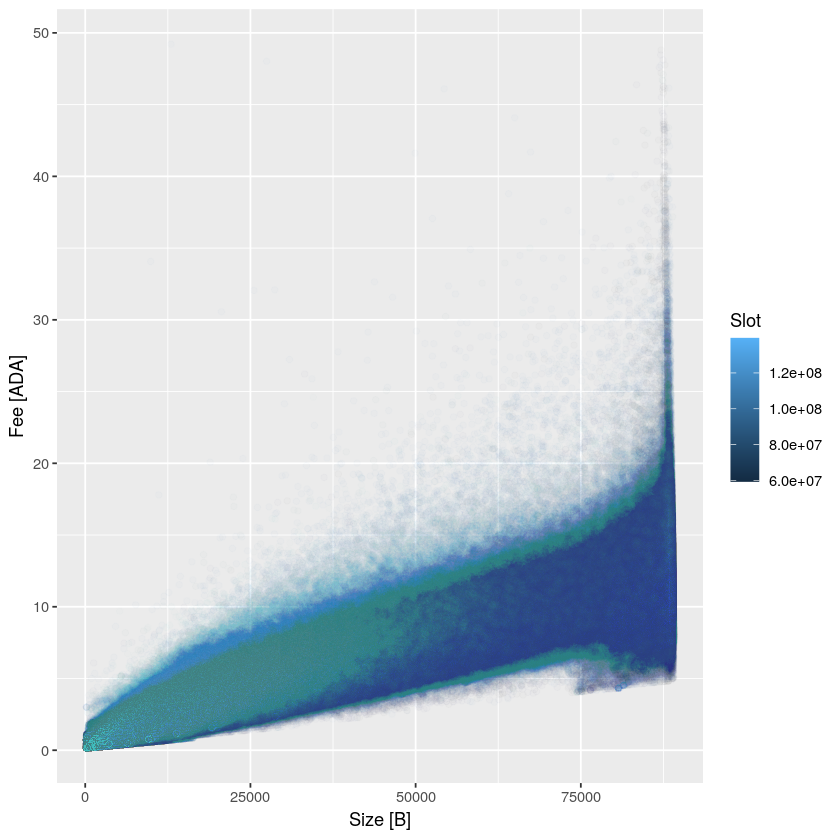

In [4]:
ggplot(bp[`Fee [ADA]` <= 50][order(`Slot`)], aes(x=`Size [B]`, y=`Fee [ADA]`, color=`Slot`)) +
  geom_point(alpha=0.01)

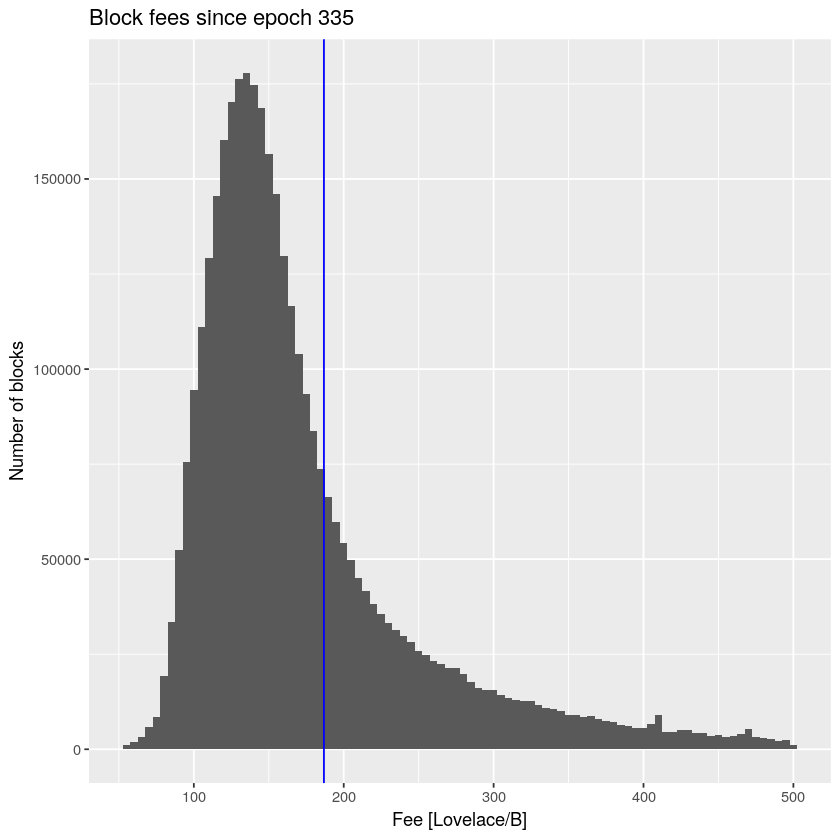

In [5]:
ggplot(bp[`Fee [Lovelace/B]` <= 500], aes(x=`Fee [Lovelace/B]`)) +
  geom_histogram(binwidth=5) +
  geom_vline(xintercept=bp[, mean(`Fee [Lovelace/B]`)], color="blue") +
  ylab("Number of blocks") +
  ggtitle("Block fees since epoch 335")

In [6]:
ggsave("fee-per-byte.svg", width=8, height=6, units="in", dpi=200)

In [7]:
ggsave("fee-per-byte.png", width=8, height=6, units="in", dpi=200)

In [8]:
re <- fread("/extra/iohk/ouroboros-leios/analysis/reward_earned.csv")
re <- dcast(re, `Epoch Earned` + `Epoch Spendable` ~ `Party`, value.var="Reward [ADA]")[, .(
    `Epoch Earned`,
    `Epoch`=`Epoch Spendable`,
    `Leader Reward [ADA]`=`leader`,
    `Member Reward [ADA]`=`member`,
    `Total Reward [ADA]`=`leader`+`member`,
    `Leader Reward [%/100]`=`leader`/(`leader`+`member`)
)]
re %>% summary

  Epoch Earned       Epoch       Leader Reward [ADA] Member Reward [ADA]
 Min.   :335.0   Min.   :337.0   Min.   :1730551     Min.   : 6491130   
 1st Qu.:381.2   1st Qu.:383.2   1st Qu.:1982811     1st Qu.: 7366006   
 Median :427.5   Median :429.5   Median :2156110     Median : 8158331   
 Mean   :427.5   Mean   :429.5   Mean   :2267039     Mean   : 8589703   
 3rd Qu.:473.8   3rd Qu.:475.8   3rd Qu.:2521410     3rd Qu.:10148602   
 Max.   :520.0   Max.   :522.0   Max.   :3204407     Max.   :10674486   
 Total Reward [ADA] Leader Reward [%/100]
 Min.   : 8260921   Min.   :0.1817       
 1st Qu.: 9348519   1st Qu.:0.2029       
 Median :10250793   Median :0.2105       
 Mean   :10856742   Mean   :0.2091       
 3rd Qu.:12671558   3rd Qu.:0.2157       
 Max.   :13821976   Max.   :0.2339       

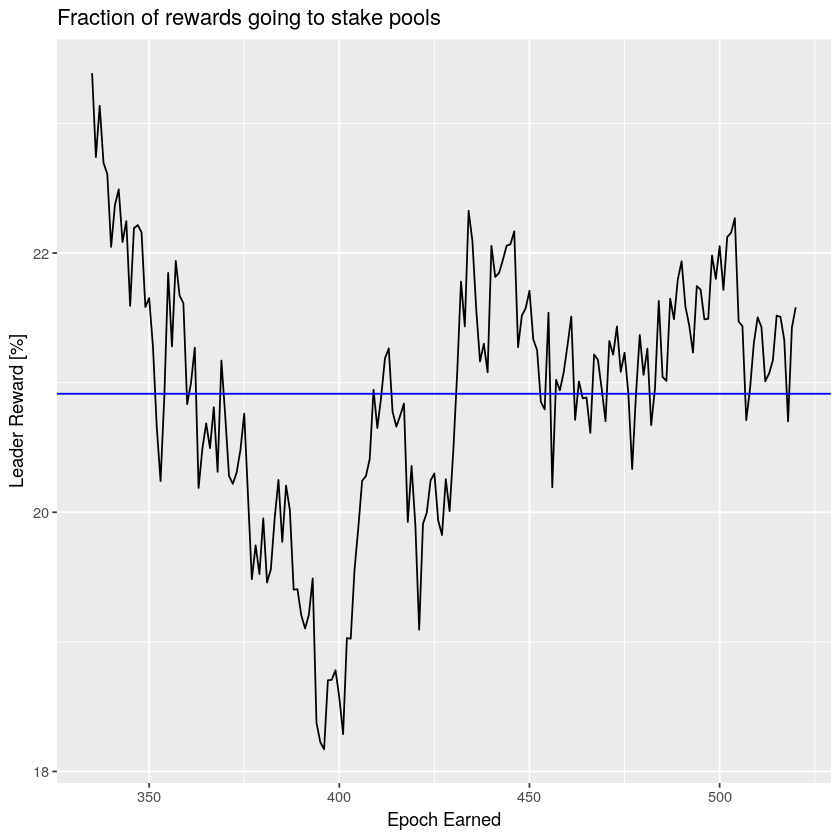

In [9]:
ggplot(re[!is.na(`Leader Reward [%/100]`)], aes(x=`Epoch Earned`, y=100*`Leader Reward [%/100]`)) +
  geom_line() +
  geom_hline(yintercept=re[, 100 * mean(`Leader Reward [%/100]`, na.rm=TRUE)], color="blue") +
  ylab("Leader Reward [%]") +
  ggtitle("Fraction of rewards going to stake pools")

In [10]:
ggsave("leader-reward.svg", width=8, height=6, units="in", dpi=200)

In [11]:
ggsave("leader-reward.png", width=8, height=6, units="in", dpi=200)

In [12]:
ra <- fread("/extra/iohk/ouroboros-leios/analysis//reserve_amount.csv")
ra <- ra[, .(
    `Epoch`=tail(`Epoch`, -1), 
    `Treasury [ADA]`=tail(`Treasury [ADA]`, -1),
    `Treasury Increase [ADA]`=diff(`Treasury [ADA]`),
    `Treasury Withdrawal [ADA]`=tail(`Treasury Withdrawal [ADA]`, -1),
    `Reserves [ADA]`=tail(`Reserves [ADA]`, -1), 
    `Reserves Spent [ADA]`=-diff(`Reserves [ADA]`)
)][, `:=`(
    `Reserves to Rewards [ADA]`=`Reserves Spent [ADA]`- (`Treasury Increase [ADA]`+`Treasury Withdrawal [ADA]`),
    `Reserves Spent [%/100/epoch]`=`Reserves Spent [ADA]`/`Reserves [ADA]`
)]
ra %>% summary

     Epoch       Treasury [ADA]      Treasury Increase [ADA]
 Min.   :336.0   Min.   :8.968e+08   Min.   :-97400096      
 1st Qu.:382.2   1st Qu.:1.098e+09   1st Qu.:  4864255      
 Median :428.5   Median :1.345e+09   Median :  5239293      
 Mean   :428.5   Mean   :1.294e+09   Mean   :  3771790      
 3rd Qu.:474.8   3rd Qu.:1.487e+09   3rd Qu.:  5710798      
 Max.   :521.0   Max.   :1.592e+09   Max.   :  6139344      
 Treasury Withdrawal [ADA] Reserves [ADA]      Reserves Spent [ADA]
 Min.   :        0         Min.   :7.633e+09   Min.   :12674722    
 1st Qu.:        0         1st Qu.:8.261e+09   1st Qu.:14162093    
 Median :        0         Median :8.947e+09   Median :15401067    
 Mean   :  1535275         Mean   :9.007e+09   Mean   :16079578    
 3rd Qu.:        0         3rd Qu.:9.728e+09   3rd Qu.:18296556    
 Max.   :102140000         Max.   :1.060e+10   Max.   :19788072    
 Reserves to Rewards [ADA] Reserves Spent [%/100/epoch]
 Min.   : 8188220          Min.   :0.0016

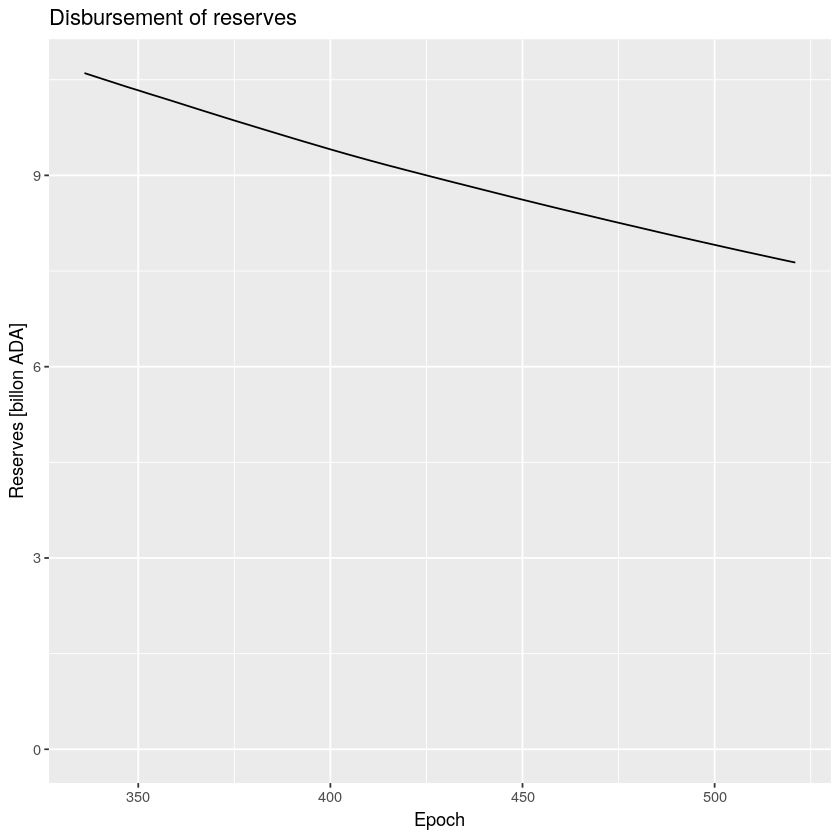

In [13]:
ggplot(ra, aes(x=`Epoch`, y=`Reserves [ADA]`/1e9)) +
  geom_line() +
  ylim(0, NA) +
  ylab("Reserves [billon ADA]") +
  ggtitle("Disbursement of reserves")

In [14]:
ggsave("reserves-disbursement-absolute.svg", width=8, height=6, units="in", dpi=200)

In [15]:
ggsave("reserves-disbursement-absolute.png", width=8, height=6, units="in", dpi=200)

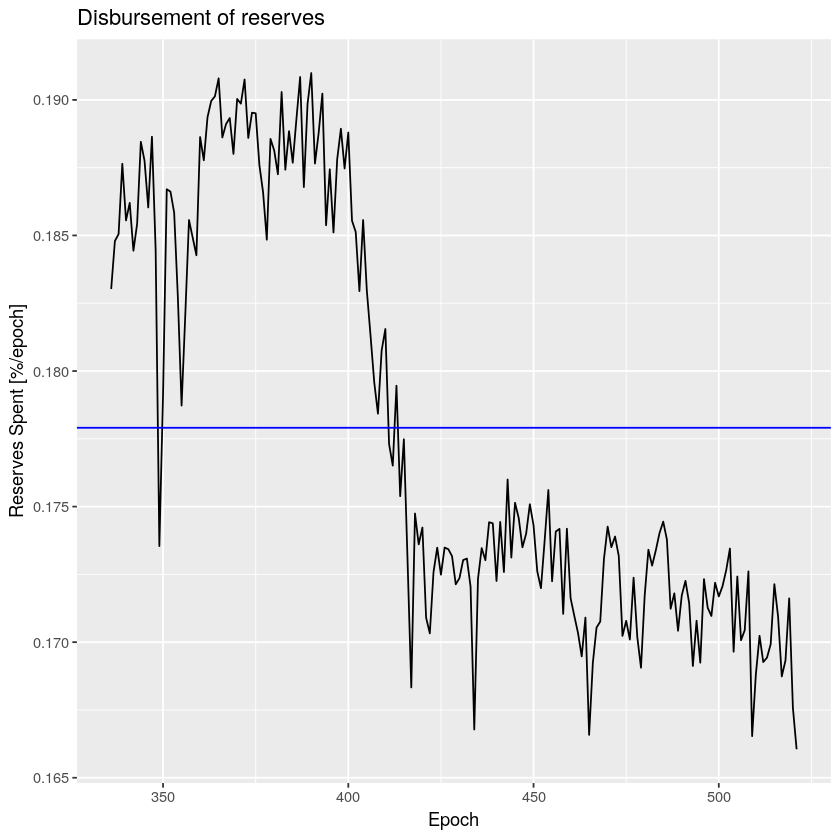

In [16]:
ggplot(ra, aes(x=`Epoch`, y=100*`Reserves Spent [%/100/epoch]`)) +
  geom_line() +
  geom_hline(yintercept=ra[, 100 * mean(`Reserves Spent [%/100/epoch]`)], color="blue") +
  ylab("Reserves Spent [%/epoch]") +
  ggtitle("Disbursement of reserves")

In [17]:
ggsave("reserves-disbursement-relative.svg", width=8, height=6, units="in", dpi=200)

In [18]:
ggsave("reserves-disbursement-relative.png", width=8, height=6, units="in", dpi=200)

In [19]:
rff <- re[ra, on=.(`Epoch`)][, .(
    `Epoch`, 
    `Rewards from Fees [%]`=100*(1-`Reserves to Rewards [ADA]` / `Total Reward [ADA]`)
)][!is.na(`Rewards from Fees [%]`)]

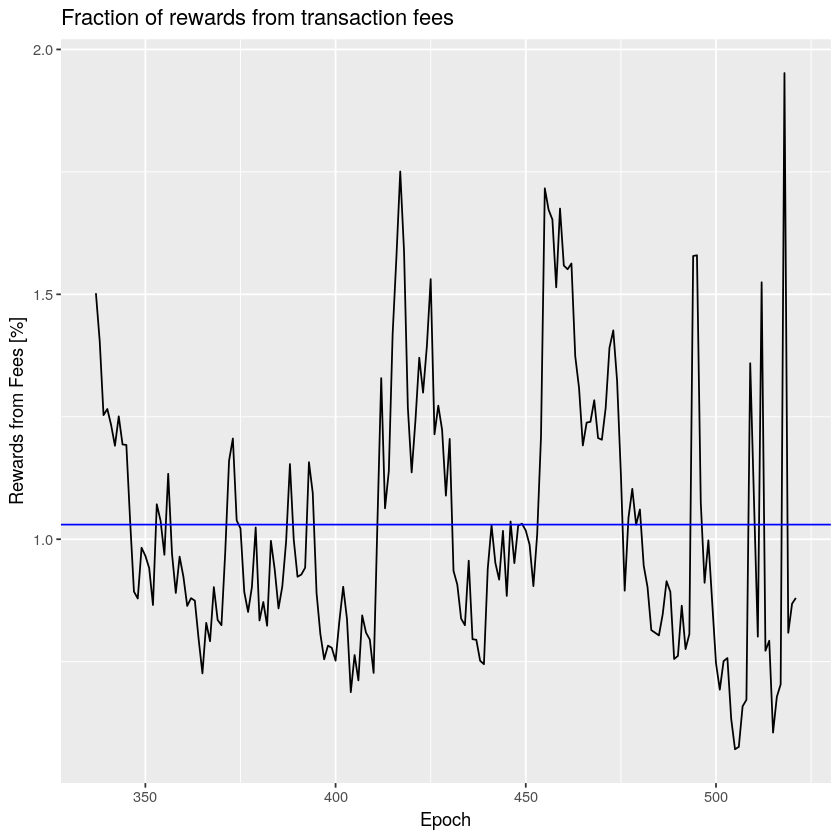

In [20]:
ggplot(rff, aes(x=`Epoch`, `Rewards from Fees [%]`)) +
    geom_line() +
    geom_hline(yintercept=rff[, mean(`Rewards from Fees [%]`)], color="blue") +
    ggtitle("Fraction of rewards from transaction fees")

In [21]:
ggsave("reserves-reward-fraction.svg", width=8, height=6, units="in", dpi=200)

In [22]:
ggsave("reserves-reward-fraction.png", width=8, height=6, units="in", dpi=200)

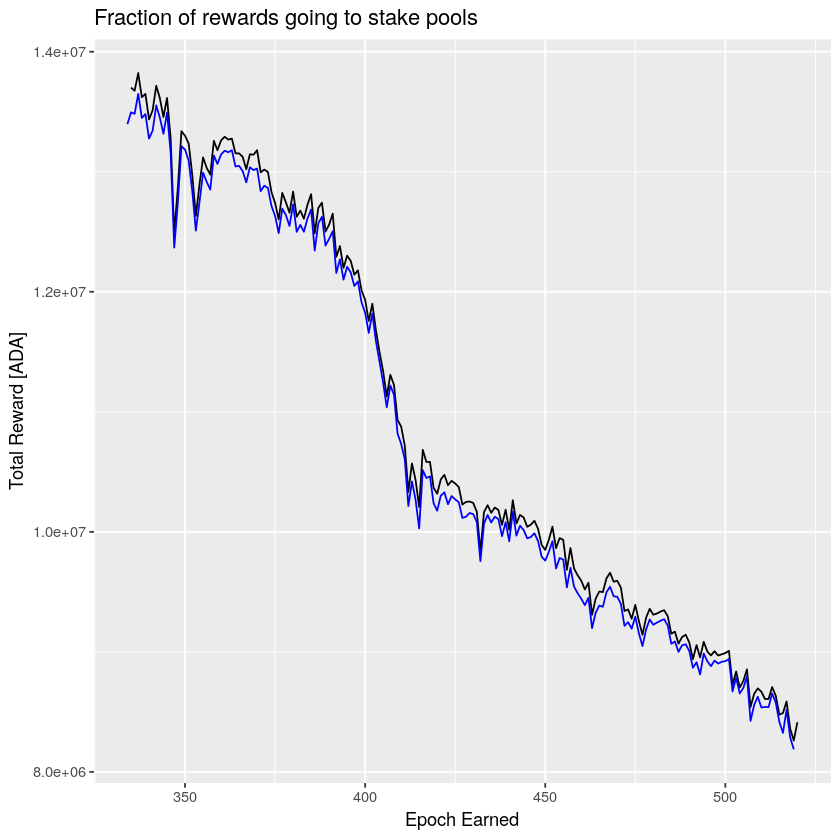

In [23]:
ggplot(re, aes(x=`Epoch Earned`, y=`Total Reward [ADA]`)) +
  geom_line() +
  geom_line(data=ra, aes(x=`Epoch`-2, y=`Reserves to Rewards [ADA]`), color="blue") +
  ggtitle("Fraction of rewards going to stake pools")

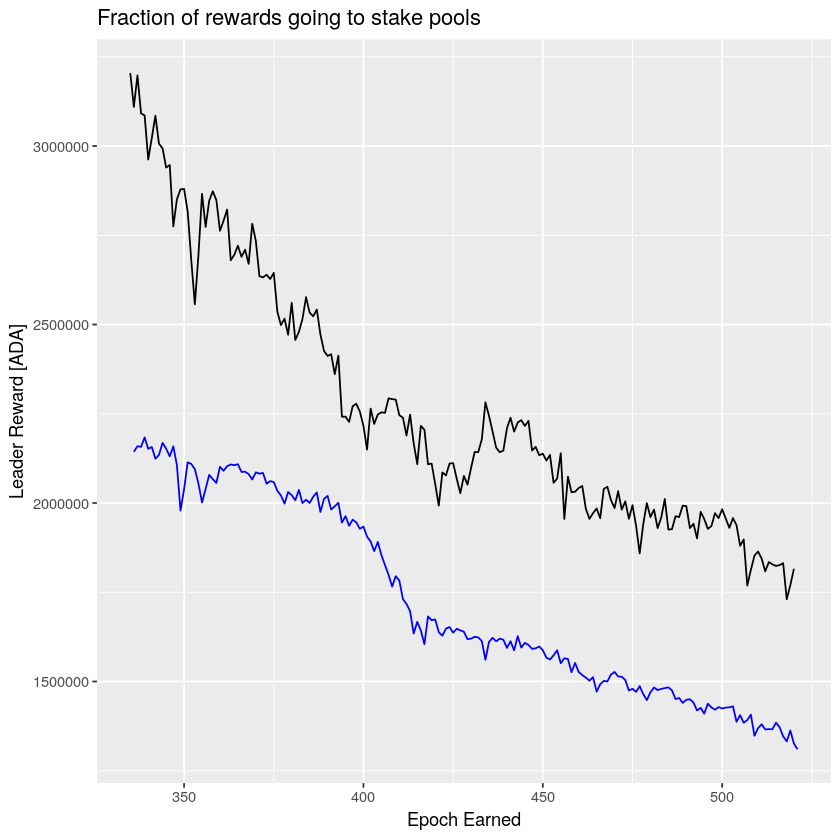

In [24]:
ggplot(re[!is.na(`Leader Reward [%/100]`)], aes(x=`Epoch Earned`, y=`Leader Reward [ADA]`)) +
  geom_line() +
  geom_line(data=ra, aes(x=`Epoch`, y=0.80*0.20*`Reserves to Rewards [ADA]`), color="blue") +
  ggtitle("Fraction of rewards going to stake pools")

In [25]:
0.12 * mapply(function(r) (1+r)/r, c(5, 10, 15, 20) / 100 / 12)

[1] 28.92 14.52  9.72  7.32

In [26]:
173.01 * 1e-6 * 1e9 / 3 / 500

[1] 115.34

In [27]:
0.12 * mapply(function(r) (1+r)/r, c(5, 10, 15, 20) / 100 / 12) / (173.01 * 1e-6 * 1e9 / 3 / 500)

[1] 0.25073695 0.12588868 0.08427259 0.06346454

In [28]:
0.12 * mapply(function(r) (1+r)/r, c(5, 10, 15, 20) / 100 / 12) / (173.01 * 1e-6 * 1e9 / 3 / 2500) / (1 - 0.17) / (1 - 0.59)

[1] 3.6840575 1.8496720 1.2382102 0.9324793

In [29]:
(173.01 * 1e-6 * 1e9 / 3 / 2500) * (1 - 0.17) * (1 - 0.59)

[1] 7.85004

In [30]:
(173.01 * 1e-6 * 1e9 / 3 / 500)

[1] 115.34